# House Price Prediction by using MELBOURNE_HOUSE_PRICE_LESS Dataset


# 1. Introduction (Data Collection and Variable Description)
We have collected the MELBOURNE_HOUSE_PRICE_LESS dataset from Kaggle. This data contains rows and coulmns in real estate business. We will try to find important regressors relating to housing price. 

# a. Data and Variable Description

In [50]:
# Reading and creating a datafreame by using the dataset.
import pandas as pd
d=pd.read_csv('C:/Users/niazs/Desktop/IS 685 Python/Project data/MELBOURNE_HOUSE_PRICES_LESS.csv')
df=pd.DataFrame(d)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 13 columns):
Suburb           63023 non-null object
Address          63023 non-null object
Rooms            63023 non-null int64
Type             63023 non-null object
Price            48433 non-null float64
Method           63023 non-null object
SellerG          63023 non-null object
Date             63023 non-null object
Postcode         63023 non-null int64
Regionname       63023 non-null object
Propertycount    63023 non-null int64
Distance         63023 non-null float64
CouncilArea      63023 non-null object
dtypes: float64(2), int64(3), object(8)
memory usage: 6.3+ MB


There are 13 features ( that is variables) and 63023 rows ( that is observations) in the dataset. The variable Price has only 48433 rows and the rest are missing. The variable descriptions are given below: 

Suburb: Suburb

Address: Address of the house

Rooms: Number of rooms

Price: Price in dollars

Method: Status of property sale -

S - property sold; 

SP - property sold prior; 

PI - property passed in; 

PN - sold prior not disclosed; 

SN - sold not disclosed; 

VB - vendor bid; 

W -  withdrawn prior to auction; 

SA - sold after auction; 

SS - sold after auction price not disclosed.


Type: Type of house -

h - house,cottage,villa, semi,terrace; 
u - unit, duplex; 
t - townhouse;

SellerG: Real Estate Agent

Date: Date sold

Postcode: Postal code of the house

Distance: Distance from Central Business District (CBD)

Regionname: General Region (West, North West, North, North east …etc)

Propertycount: Number of properties that exist in the suburb.

Councilarea: Council area in the location of the house

# b. Type of the variables
We have numerical variables: Rooms, Price,Propertycount and Distance.
The variables: Suburb, Address, Type, Method, SellerG, Postcode, Regionname and CouncilArea has to be categorical, the variable Date has to be in the format Date Object. So we are converting these variables below:

In [52]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [53]:
ctgr_var= ['Suburb', 'Address', 'Type', 'Method', 'SellerG','Postcode','Regionname','CouncilArea']

df['Date'] = pd.to_datetime(df['Date'])
for colname in ctgr_var:
    df[colname] = df[colname].astype('category')  
print(df.select_dtypes(['object']).columns)

Index([], dtype='object')


The variables becomes categorical now. 

# 2. Cleaning and Exploratory Data Analysis: 
# a. Cleaning data
At first we need to check if there is any missing values in the dataset. Let's check the missing values...

In [54]:
#counting the number of missing observations in each variable
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price            14590
Method               0
SellerG              0
Date                 0
Postcode             0
Regionname           0
Propertycount        0
Distance             0
CouncilArea          0
dtype: int64

In [55]:
##percentage of missing data
df.isnull().sum()/len(df)*100

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price            23.150278
Method            0.000000
SellerG           0.000000
Date              0.000000
Postcode          0.000000
Regionname        0.000000
Propertycount     0.000000
Distance          0.000000
CouncilArea       0.000000
dtype: float64

Here the variable Price has 14590 (23.1503 percent) missing values. This is a huge percentage which will invalid our analysis. We have decided to replace these rows with the mean value Price. 

In [56]:
import numpy as np
# mark zero values as missing or NaN
#df[[4]] = df.replace(0, np.NaN)
# fill missing values with mean column values
df.fillna(df.mean(), inplace=True)

In [57]:
#df.dropna() to drop the missing rows
print(df.isnull().sum())

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Postcode         0
Regionname       0
Propertycount    0
Distance         0
CouncilArea      0
dtype: int64


In [58]:
df.shape

(63023, 13)

# b. EDA with graphs and diagrams
We will calculate the statistics of the target variable price and then calculate bar diagrams for the categorical variables

In [59]:
minimum_price = np.min(df['Price'])

# TODO: Maximum price of the data
maximum_price = np.max(df['Price'])

# TODO: Mean price of the data
mean_price = np.mean(df['Price'])

# TODO: Median price of the data
median_price = np.median(df['Price'])

# TODO: Standard deviation of prices of the data
std_price = np.std(df['Price'])

# Show the calculated statistics
print ("Statistics for Melbourne housing dataset:\n")
print ("Minimum price: ${:,.2f}".format(minimum_price))
print ("Maximum price: ${:,.2f}".format(maximum_price))
print ("Mean price: ${:,.2f}".format(mean_price))
print ("Median price ${:,.2f}".format(median_price))
print ("Standard deviation of prices: ${:,.2f}".format(std_price))

Statistics for Melbourne housing dataset:

Minimum price: $85,000.00
Maximum price: $11,200,000.00
Mean price: $997,898.24
Median price $997,898.24
Standard deviation of prices: $520,279.36


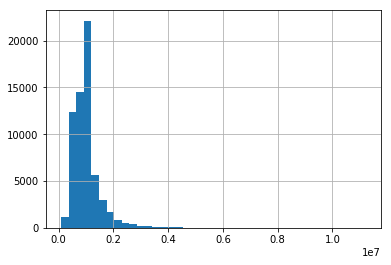

In [60]:
import matplotlib.pyplot as plt
plt.grid()
plt.hist(df['Price'],bins=40)
plt.show()

The distribution of Price is not symmetric means the distribution is not normal. It is skewed to the right. Let's scale the variable by using scaling function of sklearn..

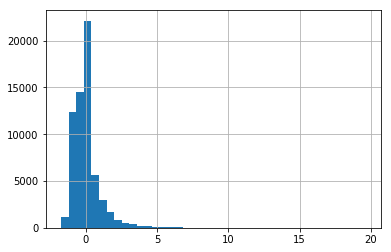

In [61]:
import numpy as np
y_mean = np.mean(df['Price'])
y_std = np.std(df['Price'])
y_scaled = (df['Price']-y_mean)/y_std
plt.grid()
plt.hist(y_scaled,bins=40)
plt.show()

The distribution of price is still skewed to the right. We should try another transformation. Lets apply logarithemic transformation of y.

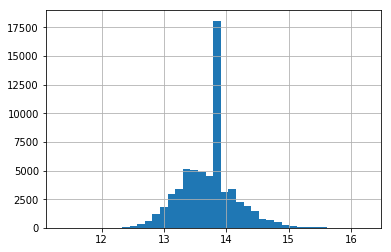

In [62]:
y_log = np.log(df['Price'])
plt.grid()
plt.hist(y_log,bins=40)
plt.show()

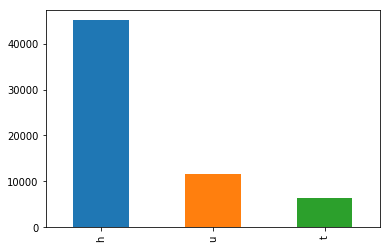

In [63]:
## bar diagram for the vaiable Type of the house
df['Type'].value_counts().plot(kind='bar')

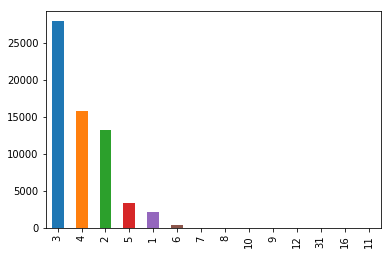

In [64]:
## bar diagram for the vaiable Rooms
df['Rooms'].value_counts().plot(kind='bar')

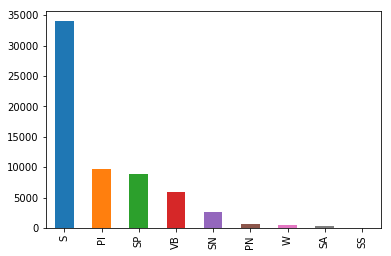

In [65]:
## bar diagram for the vaiable Method
df['Method'].value_counts().plot(kind='bar')

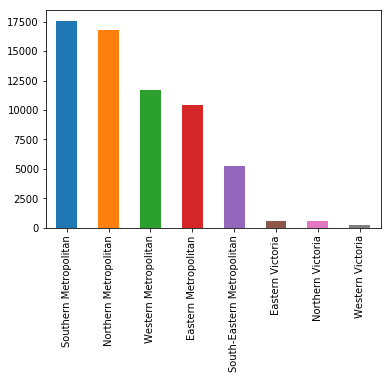

In [66]:
## bar diagram for the vaiable Regionname
df['Regionname'].value_counts().plot(kind='bar')

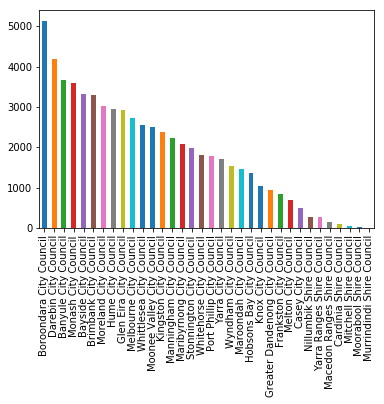

In [67]:
df['CouncilArea'].value_counts().plot(kind='bar')

Scatter diagram to see the correlation between pice and different numerical variables...

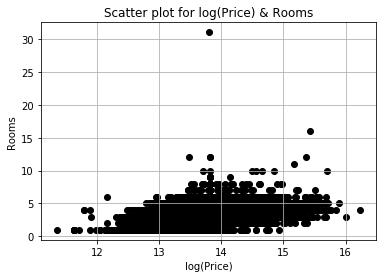

In [68]:
import matplotlib.pyplot as plt
plt.grid()
plt.scatter(y_log,df['Rooms'],c='black')
plt.xlabel('log(Price)')
plt.ylabel('Rooms')
plt.title('Scatter plot for log(Price) & Rooms')
plt.show()

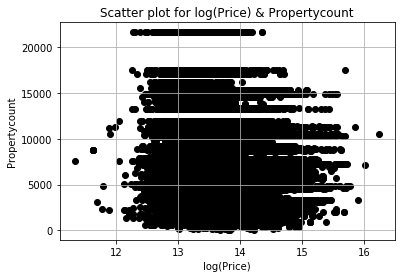

In [69]:
plt.grid()
plt.scatter(y_log,df['Propertycount'],c='black')
plt.xlabel('log(Price)')
plt.ylabel('Propertycount')
plt.title('Scatter plot for log(Price) & Propertycount')
plt.show()

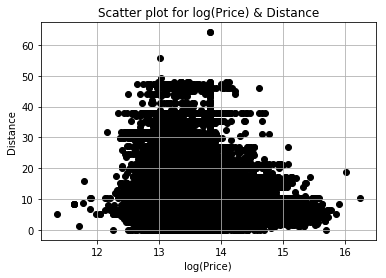

In [70]:
plt.grid()
plt.scatter(y_log,df['Distance'],c='black')
plt.xlabel('log(Price)')
plt.ylabel('Distance')
plt.title('Scatter plot for log(Price) & Distance')
plt.show()

# 3. Hypothesis Test, Feature Engineering & Model selection:

We will try to find the predictors that influence the price of house in Melbourne. So at first we will try to find out the correlation between Price and Distance, between Price and Rooms, and between Price and Propertycount. So our first hypothesis is:

H0_a: There exists no linear correlation between the Price and Distance ( that is population corr. coef = 0).
#H1_a: There exists linear correlation between the Price and Distance ( that is population corr. coef is not 0).

H0_b : There exists no linear correlation between the Price and Rooms.
#H1_b: There exists linear correlation between the Price and Rooms.

H0_c: There exists no linear correlation between the Price and Propertycount.
#H1_c: There exists linear correlation between the Price and Propertycount.

In [71]:
from scipy.stats import pearsonr
corr, p_value = pearsonr(y_log, df['Distance'])
print(corr, p_value)

-0.22607492133386084 0.0


The correlation between Price and Distances is weakly negative, and the correlation is significant because the p-value is less than 0.05. So we can conclude that Price of a house and its Distance from CBD is weakly negatively correlated with correlation coefficient -0.2261. Therefore our first hypothesis is rejected. 

In [72]:
from scipy.stats import pearsonr
corr, p_value = pearsonr(y_log, df['Rooms'])
print(corr, p_value)

0.4060431086717598 0.0


The p-value is 0.0 < 0.05, so we can reject our second hull hypothesis. Therefore we can conclude that there exists moderate positive linear correlation between Price and Number of Rooms in the house.

In [73]:
from scipy.stats import pearsonr
corr, p_value = pearsonr(y_log, df['Propertycount'])
print(corr, p_value)

-0.0719360908957598 4.4031402085799884e-73


The p-value is less than 0.05, so we can reject the null hypothesis. We can conclude that price is weakly negatively correlated with Propertycount. 

# a. Multiple Linear Regression
Because we have found that Price is significantly positively linearly correlated with Rooms and significantly negatively linearly correlated with Distance and with Propertycount, so we can try to find a linear regression equation for Price with regressors Distance and Propertycount ( we cannot include Rooms as it is a categorical variable) and will test the significance of the linear regression equation with F-test as well as indivisual t-test. 

For the hypothesis for the F-test is:

H0_a = The regression coeff(Distance) = coeff(Propertycount) = 0.

H1_a = At least one of the regression coefficients are not equal to zero.

H0_b = The regression coefficient of Propertycount is 0.

H1_b = The regression coefficient of Propertycount is not 0.

H0_c = The regression coefficient of Distance is 0.

H1_c = The regression coefficient of Distance is not 0.

In [74]:
import statsmodels.api as sm
#creating X and y 
X =df[['Propertycount', 'Distance']]
X1 = sm.add_constant(X) ## let's add an intercept (beta_0) to our model
# Create target variable
y = y_log

In [75]:
import statsmodels.api as sm
model = sm.OLS(y_log, X1).fit() # Regression with the intercept
predictions = model.predict(X1)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     1864.
Date:                Mon, 10 Dec 2018   Prob (F-statistic):               0.00
Time:                        18:34:50   Log-Likelihood:                -35784.
No. Observations:               63023   AIC:                         7.157e+04
Df Residuals:                   63020   BIC:                         7.160e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            13.9290      0.004   3169.815      0.000      13.920      13.938
Propertycount  -6.83e-06   3.84e-07    -17.766      0.000   -7.58e-06   -6.08e-06
Distance         -0.0130      0.000    -58.152      0.000      -0.013      -0.013
==============================================================================
Omnibus:                     1539.294   Durbin-Watson:                   1.584
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3295.253
Skew:                           0.126   Prob(JB):                         0.00
Kurtosis:                       4.092   Cond. No.                     2.28e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.28e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [76]:
import statsmodels.api as sm
model = sm.OLS(y, X).fit() # Regression without the intercept
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                 1.713e+05
Date:                Mon, 10 Dec 2018   Prob (F-statistic):               0.00
Time:                        18:34:52   Log-Likelihood:            -1.9580e+05
No. Observations:               63023   AIC:                         3.916e+05
Df Residuals:                   63021   BIC:                         3.916e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Propertycount     0.0008   3.67e-06    216.424      0.000       0.001       0.001
Distance          0.4396      0.002    201.025      0.000       0.435       0.444
==============================================================================
Omnibus:                     8306.910   Durbin-Watson:                   0.551
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12881.170
Skew:                          -0.942   Prob(JB):                         0.00
Kurtosis:                       4.166   Cond. No.                         894.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

For the regression without intercept, 
R-squared and Adjusted R-squared = 0.845, which indicates that about 84.5 percent variation in Price is explained by Distance and Propertycount. Although the F-statistic is very low but the overall multiple linear regression is significant at 1% significance level and the individual coefficients are also significant at 5% significance level. The fitted multiple linear regression model is 
                        
                        ln(Price) = 0.0008 * Propertycount +0.4396 * Distances

by taking intercept 0 (which is also called regression into the origin).

We can say that, if Propertycount is increased by one unit then ln(Price) will be increased by 0.0008 unit (when the we assume that the effect of Distance is zero) and if Distance from CBD is increased by one unit the ln(Price) of the property will also be increased by 0.4396 unit (when the effect of Propertycount is constant). From the fitted regression equation it is clear that the regressor Distance has the largest impact on the price. Also the Durbin-Watson test statistic is 0.551 and the Jarque-Bera (JB) test statistic is 12881.17 with p-value 0.00. So we will reject the null hypothesis of normality of error in Jarque Bera (JB) test. In Durbin-Watson test we can also reject the null hypotheis which means the data don't have any autocorrelation.

# b. Simple Linear Regression with only one regressor 
We will use the regressor Distance only to form the linear equation of Price and will examine how it works.

In [78]:
Distance = df['Distance']
# Fitting data to a linear regression using least squares

slope, intercept = np.polyfit(Distance, y, 1)
print(slope, intercept)

# Specify slopes to consider: a_vals
a_vals = np.linspace(0, 0.1, 200)

# Initialize sum of square of residuals: rss
rss = np.empty_like(a_vals)

# Compute sum of square of residuals for each value of a_vals
for i, a in enumerate(a_vals):
    rss[i] = np.sum((y - a * Distance - intercept)**2) # Here my slope is x and are being multiplied by x values which is a.
#print(np.mean(rss))

-0.013083633979397111 13.8776354892009


In [79]:
Prop = df['Propertycount']
# Fitting data to a linear regression using least squares

slope, intercept = np.polyfit(Prop, y, 1)
print(slope, intercept)

-7.143700731007318e-06 13.766090594938285


We have fitted the simple linear regression for ln(Price) and Distance, and for ln(Price) and Propertycount. In both case the intercept are negative and the slopes are positive. But in simple linear regression equation of ln(Price) with Propertycount, the intercept is larger compared to the intercept in the simple linear equation of ln(Price) and Distance. 

ln(Price) = -0.0130836 + 13.8776354892 * Distances

ln(Price) = -7.143700731007318 e-06 + 13.76609059494 * Propertycount

But we prefer the previous multiple linear regression model rather that these two simple linear regression models. 

# c. Checking the assumptions of linear regression
The assumptions are:

Multivariate normality

No or little multicollinearity

No auto-correlation

Homoscedasticity

We will check each of them to see whether the regression satisfies the assumptions or not and will comment on the validity of the linear regression. 

# c.1. Normality Chekcking:
We check the multivariate normality by normal QQ plot.

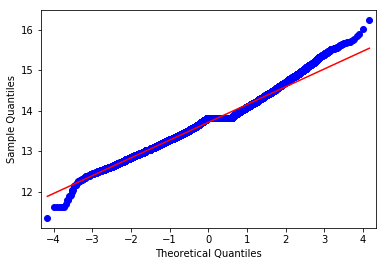

In [80]:
# QQ Plot
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate univariate observations
#data = 5 * randn(100) + 50
# q-q plot
qqplot(y, line='s')
pyplot.show()

From see that distribution of Price is looks almost normal in the normal Q-Q plot. So we assume that the data is normal. 

# c.2. Checking Multicollinearity

In [81]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,2.3,Propertycount
1,2.3,Distance


VIF = 1/ (1-R-square). 

Since VIF for for Distance as well as Propertycount is 2.3 which is less than 10 ( or less than 5). So we can say that there is no multicollinearity in the data.

# c.3. Checking Autocorrelation and Heteroscedasticy
We coudn't test the autocorrelation and heteroscedasticity. So before we make final comment on this data based on the multiple linear regression model we have used, we should mention that: 
if the model passed the Autocorrelation and Heteroscedasticy test then the conclusion will be valid.

Durbin-Watson: 
0.551
Prob(Omnibus):
0.000
Jarque-Bera (JB): 
12881.170
Prob(JB): 
0.00



Durbin-Watson: 
0.551
Prob(Omnibus):
0.000
Jarque-Bera (JB): 
12881.170
Prob(JB): 
0.00

# 4. Machine Learning Model Implementation

# a. Random Forest Regressor
We will apply ransom forest regressor to predict the house price based on relevent regressors. Here we have used Distance and Propertycount as regressors and Price as a target variable.

In [82]:
X_R=df[['Distance','Rooms','Propertycount','Postcode']]
# Train, test, split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_R,y, test_size = .20, random_state= 0)

#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rfreg = RandomForestRegressor(max_depth=5,random_state=42,n_estimators=200)
rfreg.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [83]:
y_pred = rfreg.predict(X_test)
rfreg.score(X_test,y_test)

0.4900844007621078

In [84]:
rfreg.feature_importances_

array([0.41241313, 0.33459525, 0.0021848 , 0.25080683])

Our data matrix was X = df [['Distance','Rooms','Propertycount','Postcode']].

In the data matrix X the second element is Distance and here the RFR indicates that the variable Distance is more important than Propertycount, Rooms and Postcode to detect the Price of a property based on this data. Therefore, based on the data we have, we can conclude that Distance from CBD is the most important feature of the Price of a house, among the continuous and categorical features, of a property in Melbourne. 

In [86]:
rfreg.get_params(deep=True)

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

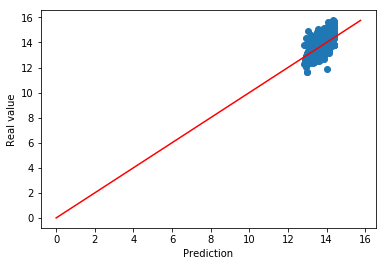

In [87]:
# Build a plot
plt.scatter(y_pred, y_test)
plt.xlabel('Prediction')
plt.ylabel('Real value')

# Now add the perfect prediction line
diagonal = np.linspace(0, np.max(y_test), 100)
plt.plot(diagonal, diagonal, '-r')
plt.show()

From the graph we see that the predicted and actual value of the 

# b. Gradient Boosting Regressor
We have also applied Gradient Boosting Regressor to see how it works with the daat. The code and the results are given below:

In [90]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2, learning_rate = 0.1, loss = 'ls')
clf.fit(X_train, y_train)
print(clf.score(X_test,y_test))
print(clf.feature_importances_)

0.535457577200788
[0.18667695 0.30200504 0.30766242 0.20365559]


Our data matrix was X = df [['Distance','Rooms','Propertycount','Postcode']]

With the gradient Boosting Regressor the score is 0.5355 which is better than Random Forest Regressor (the score is 0.0.4900). But in this case the variable Propertycount is turned out to be the most important regressor followed by Rooms, while the variable Distance is turned out to be the least important feature followed by Postcode. We can conclude that Gradient Boosting Regressor works better than Random Forest Regressor for this data. But when we have used cross validation with 
max_depth = [4,5,7,8] it was time consuming. So we have decided not to do further ML modeling in this project because of the time constraint. Therefore we can conclude that Distance and Propertycount both are most two important features (independent varables) that affect the price of a house in Melbourne based on the data we have. 

# 5. Conclusion & Further Development
In this project we have explored the variables of the Melbourne House Price Less dataset and foud that the highest number of houses are with 3 bedrooms (close to 28000) followed by 4 bedroom houses (close to 16000) and then 2 bedroom houses (13k). In the variable Method, the category Property Sold (around 29k houses) has the highest number of houses followed by the category Passed In (that is PI, 10K). The highest number of houses are from Southern Metropolitan (17,500) followed by Northern Metropolitan (16K) and the lowest number of houses is from the category Western Victoria ( around 500) followed by Northern Victoria (around 1k). In the variable CouncilArea, the highest number of houses are from Boroondara City Council (around 5,100) followed by Darebin City Council(4,200) and the lowest number of houses are from Murrindindi Shire Council (less than 50) followed by Mooraboot Shire Council (less than 100). From the histogram of Price we have found that the distribution is not symmetric, it is skewed to the right. So we have transformed the variable Price into standard transformation by subtracting the mean from the values and divide it with the standard deviation but the variable was still not normal. Then we have used logarithemic transformation by making it ln(Price) with the help of natural logarithm. After log transformation the variable becomes normal. We did this this because we will apply linear regression model to detect the price of the house based on some selected variables ( has to be continuous) and one of the important assumptions of linear regression is linearity of the target variable (in this case it is Price). 

We have calculated the correlation coefficients to see how Price is related to the numeric variables Distance and Propertycount and with the categorical variable Rooms. It was found that the correlation between 

By analysing the Melbourne Housing Price Data Less with the help of linear regression and random forest regressor, we have found that the Distance from CBD is the most important feature of Price, among the numeric variables. From the multiple linear regression model we have found that 

                        ln(Price) = 0.0008 * Propertycount +0.4396 * Distances

From this fitted line, we can say that ln(Price) will be increased one unit if the Distances increased by 0.4396 unit ( by assuming that the effect of Propertycount is zero), and ln(Price) of the property will be increased by 0.0008 unit if the Propertycount is increased by one unit (when there is no effect of Distance). We should have the restriction of assumption checking and we have only checked the Normality and Multicollineariy assumptions. So the validity of the multiple linear regression model is with the assumption that: we assume there exists no autocorrelation and heteroscedasticity in the data. 


In ML model implementation, we have used Random Forest Regressior and Gradient Boosting Regressor. In Gradient Boosting Regressor the score is 0.5355, which is larger than the score of Random Forest Regressor(which is 0.0.4900). In GB Regressor we have found that the variable Propertycount is the most important feature followed by Rooms and the variable Distance is the least important feature followed by Postcode. We can conclude that Gradient Boosting Regressor works better than Random Forest Regressor for this data because it has better score. We have used cross validation with max_depth = [4,5,7,8] it was time consuming. We have tried some other ML modeling for this dat but those models are not worked well for this data. 

Therefore we can conclude that Distance and Propertycount are two most important features (independent varables) that affect the price of a house in Melbourne based on the data we have. The greater the distance from CBD the larger the price of the house will be (by assuming that the effect of Propertycount is zero)and the greater the number of the property that exist in the suburb(when the effect of Distance is zero), the larger the price of the property will be.  

# a. Further Development
Here we have used the cross validation to see the accuracy of the random forest regressor but it was be time consuming when we have used max_depth = [4,5,6,7,8], so we have decided not to move further with the cross validation. Because of the time and knowledge constraint we coudn't do further analsis. If we have eonough time and knowledge we could have developed better model but we are not sure about that model. So for further development we can only suggest to do the hyperparameter tuning. 

. 